In [70]:
import csv
import pandas as pd
import numpy as np
#from sklearn import
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

## Years to Load

In [35]:
years = [15, 16]

In [76]:
taxi_df = {}

for i in years:
    taxi_df[i] = pd.read_csv("../dataset_4_02_modified/20" + str(i) \
                            + "lag.csv", sep = ",")
# "2016" and before
# taxi_df[15] = pd.concat([taxi_df[15], taxi_df[16]], axis = 0)\
#               .reset_index().drop(columns = ['index'])

In [77]:
y_df = {}
X_raw_df = {}
for i in years:
    y_df[i] =  pd.DataFrame(taxi_df[i]['Count'])
    X_raw_df[i] = taxi_df[i].drop(columns = ['Pickup Community Area', \
                                             'Count', 'Trip Start Timestamp'])

In [78]:
weekdays = ['0','1','2','3','4','5','6']
enc = OneHotEncoder(categories=[weekdays])

encoded_df = {}
for i in years:
    enc.fit(X_raw_df[i].weekday.values.reshape(-1, 1))
    encoded_df[i] = pd.DataFrame(enc.transform(X_raw_df[i].weekday.values.reshape(-1, 1))\
                                 .toarray().astype(int))\
                                .rename(columns = {0: 'Monday', 1:'Tuesday', 2:'Wedneseday',\
                                3:'Thursday', 4:'Friday', 5:'Saturday',\
                                6:'Sunday'})

In [79]:
X_encode_df = {}
for i in years:
    X_encode_df[i] = pd.concat([X_raw_df[i].drop(columns=['weekday']), encoded_df[i]], axis=1) 

In [80]:
X_mat = {}
y_mat = {}
for i in years:
    X_mat[i] = X_encode_df[i].values
    y_mat[i] = y_df[i].values

In [81]:
reg = LinearRegression().fit(X_mat[15], y_mat[15])

In [82]:
reg.score(X_mat[16], y_mat[16])

0.9716155329444153

In [83]:
X2 = sm.add_constant(X_mat[15])
est = sm.OLS(y_mat[15], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.238e+06
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:35:26   Log-Likelihood:            -3.1053e+06
No. Observations:              672210   AIC:                         6.211e+06
Df Residuals:                  672189   BIC:                         6.211e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2054      0.038      5.459      0.0

In [84]:
for i in range(0, len(reg.coef_[0])):
    print("{2} {0} {1}".format(X_encode_df[16].columns.values[i], round(reg.coef_[0][i], 2),i+1))

1 dayofyear -0.14
2 dayofyear_sin 0.16
3 dayofyear_cos 0.15
4 hour 1.25
5 hour_sin 1.06
6 hour_cos -2.15
7 lat 1.24
8 lon -1.29
9 temperature 0.12
10 wind_speed -0.05
11 humidity -0.15
12 lag1 1.62
13 lag2 -0.79
14 lag3 0.14
15 Monday -0.22
16 Tuesday 0.04
17 Wedneseday 0.08
18 Thursday 0.15
19 Friday 0.59
20 Saturday 0.26
21 Sunday -0.91


# Add 2dg terms for lon and lat

In [85]:
for i in years:
    X_encode_df[i]['lat_sq'] = round(X_encode_df[i].lat.pow(2),4)
    X_encode_df[i]['lon_sq'] = round(X_encode_df[i].lon.pow(2),4)
    X_encode_df[i]['latXlon'] = round(X_encode_df[i].lat*X_encode_df[i].lon, 4)

In [86]:
X_mat = {}
y_mat = {}
for i in years:
    X_mat[i] = X_encode_df[i].values
    y_mat[i] = y_df[i].values

In [87]:
reg2 = LinearRegression().fit(X_mat[15], y_mat[15])

## R^2

In [88]:
reg2.score(X_mat[16], y_mat[16])

0.9716738330784118

In [89]:
X2 = sm.add_constant(X_mat[15])
est = sm.OLS(y_mat[15], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.079e+06
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:35:59   Log-Likelihood:            -3.1044e+06
No. Observations:              672210   AIC:                         6.209e+06
Df Residuals:                  672186   BIC:                         6.209e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2620      0.047      5.578      0.0

In [91]:
for i in range(0, len(reg2.coef_[0])):
    print("{2} {0} {1}".format(X_encode_df[16].columns.values[i], round(reg2.coef_[0][i], 2),i+1))

1 dayofyear -0.14
2 dayofyear_sin 0.16
3 dayofyear_cos 0.14
4 hour 1.25
5 hour_sin 1.03
6 hour_cos -2.14
7 lat 0.42
8 lon 1.01
9 temperature 0.11
10 wind_speed -0.05
11 humidity -0.15
12 lag1 1.62
13 lag2 -0.79
14 lag3 0.14
15 Monday -0.23
16 Tuesday 0.03
17 Wedneseday 0.08
18 Thursday 0.15
19 Friday 0.6
20 Saturday 0.27
21 Sunday -0.91
22 lat_sq 0.22
23 lon_sq 3.49
24 latXlon -3.8


## Mean Square Error

In [52]:
reg2_pred16 = reg2.predict(X_mat[16])
mean_squared_error(y_true = y_mat[16], y_pred = reg2_pred16)

397.4526127896189

## Analyze error distribution

(array([6.00000e+00, 3.70000e+01, 2.82000e+02, 1.55500e+03, 3.76326e+05,
        1.14000e+04, 1.39600e+03, 2.80000e+02, 2.70000e+01, 5.00000e+00]),
 array([-382.61772539, -303.81389611, -225.01006684, -146.20623756,
         -67.40240828,   11.40142099,   90.20525027,  169.00907954,
         247.81290882,  326.61673809,  405.42056737]),
 <a list of 10 Patch objects>)

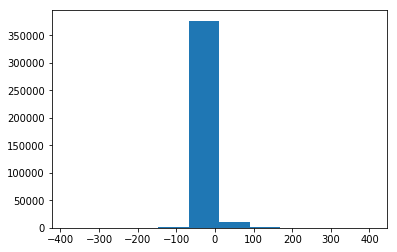

In [34]:
plt.hist(x = (y_mat[17] - reg2_pred16).reshape(1,-1)[0])

## Results (ARIMA)
### Original terms: 
#### Train 2015, Test 2016: Test R^2 0.97, Test MSE 398
### Lon Lat Sq terms: 
#### Train 2015, Test 2016: Test R^2 0.97, Test MSE 397